In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/sample_data/Housing Price.csv')

In [ ]:
train.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
train.shape

(545, 13)

In [ ]:
test = pd.read_csv('/content/sample_data/Housing Price.csv')

In [ ]:
test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
test.shape

(545, 13)

In [ ]:
train.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().sum()

,0
price,0
area,9
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              536 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [ ]:
train.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,536.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5087.304104,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2089.231412,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3562.500000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4505.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,15600.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
train_len = len(train)
test_len = len(test)

In [ ]:
print(len(train), len(test))

545 545


In [ ]:
train = train.drop(['area'], axis = 1)
train.shape

(545, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
dtypes: int64(5), object(7)
memory usage: 51.2+ KB


In [ ]:
train = pd.read_csv('/content/sample_data/Housing Price.csv', index_col = ['price'])
train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,,,,,,,,,,,,
13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
1820000,3000.0,2,1,1,yes,no,yes,no,no,2,no,unfurnished
1767150,2400.0,3,1,1,no,no,no,no,no,0,no,semi-furnished
1750000,3620.0,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [ ]:
train[['area']]

,area
price,
13300000,7420.0
12250000,8960.0
12250000,9960.0
12215000,NaN
11410000,NaN
...,...
1820000,3000.0
1767150,2400.0
1750000,3620.0


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(train[['area']])

train['area'] = impute.transform(train[['area']])

In [ ]:
train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,,,,,,,,,,,,
13300000,7420.000000,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960.000000,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960.000000,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12215000,5087.304104,4,2,2,yes,no,yes,no,yes,3,yes,furnished
11410000,5087.304104,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
1820000,3000.000000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
1767150,2400.000000,3,1,1,no,no,no,no,no,0,no,semi-furnished
1750000,3620.000000,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in categorical_columns:
    if train[col].dtype == 'object':
        train[col] = enc.fit_transform(train[col])
train = pd.get_dummies(train, columns=['furnishingstatus'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
train = train.reset_index()
X = train.drop(['price'], axis=1)
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (436, 13)
Testing set shape: (109, 13)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 area                               1650.0
bedrooms                                1
bathrooms                               1
stories                                 1
mainroad                                0
guestroom                               0
basement                                0
hotwaterheating                         0
airconditioning                         0
parking                                 0
prefarea                                0
furnishingstatus_semi-furnished     False
furnishingstatus_unfurnished        False
dtype: object
per-feature maximum before scaling:
 area                               15600.0
bedrooms                                 6
bathrooms                                4
stories                                  4
mainroad                                 1
guestroom                                1
basement                                 1
hotwaterheating                          1
airconditioning       

In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# transform test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   mainroad                         545 non-null    int64  
 6   guestroom                        545 non-null    int64  
 7   basement                         545 non-null    int64  
 8   hotwaterheating                  545 non-null    int64  
 9   airconditioning                  545 non-null    int64  
 10  parking                          545 non-null    int64  
 11  prefarea                         545 non-null    int64  
 12  furnishingstatus_semi-

<Axes: >

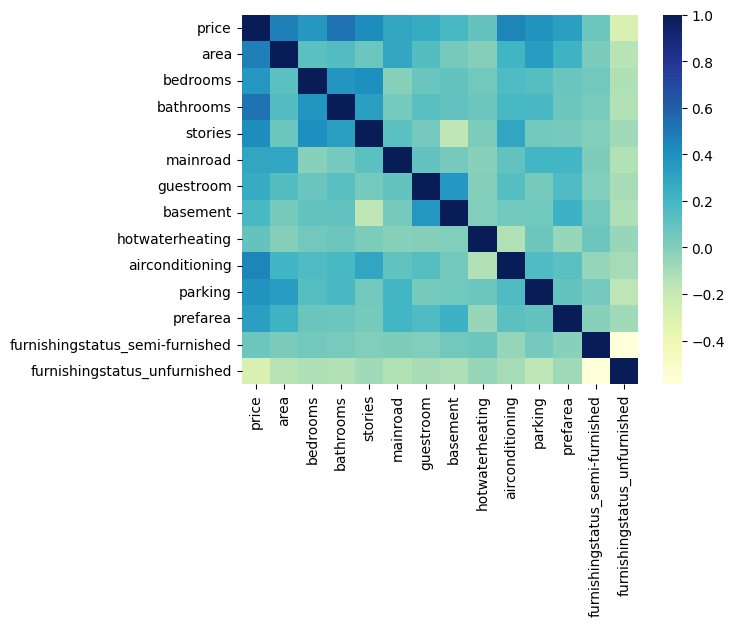

In [ ]:
train_corr = train.corr()
sns.heatmap(train_corr, cmap='YlGnBu')